In [1]:
"""
Created on Wed Jan 10 17:13:16 2024
@author: Wu Yuxuan
"""

import os
import warnings

import pandas as pd
import anndata as ad
import scanpy as sc
import seaborn as sns
import numpy as np
from matplotlib import rc_context
from matplotlib import pyplot as plt

%matplotlib inline

/tmp/ipykernel_97478/2589793195.py:9: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
seed = 123

warnings.simplefilter(action='ignore', category=FutureWarning)
# info
sc.settings.verbosity = 3 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

-----
anndata     0.10.5.post1
scanpy      0.1.dev3254+g5b9bc72
-----
PIL                 10.2.0
asttokens           NA
comm                0.2.1
cycler              0.12.1
cython_runtime      NA
dateutil            2.8.2
debugpy             1.6.7
decorator           5.1.1
executing           2.0.1
h5py                3.10.0
igraph              0.11.3
ipykernel           6.29.0
jedi                0.19.1
joblib              1.3.2
kiwisolver          1.4.5
leidenalg           0.10.2
llvmlite            0.41.1
matplotlib          3.8.3
matplotlib_inline   0.1.6
mpl_toolkits        NA
natsort             8.4.0
numba               0.58.1
numpy               1.26.4
packaging           23.2
pandas              2.2.0
parso               0.8.3
patsy               0.5.6
pexpect             4.9.0
pickleshare         0.7.5
pkg_resources       NA
platformdirs        4.1.0
prompt_toolkit      3.0.42
psutil              5.9.0
ptyprocess          0.7.0
pure_eval           0.2.2
pydev_ipython       NA

In [3]:
os.chdir('/home/wu/datb1/reseq_ppp')

/home/wu/scanpy/scanpy/plotting/_tools/scatterplots.py:399: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


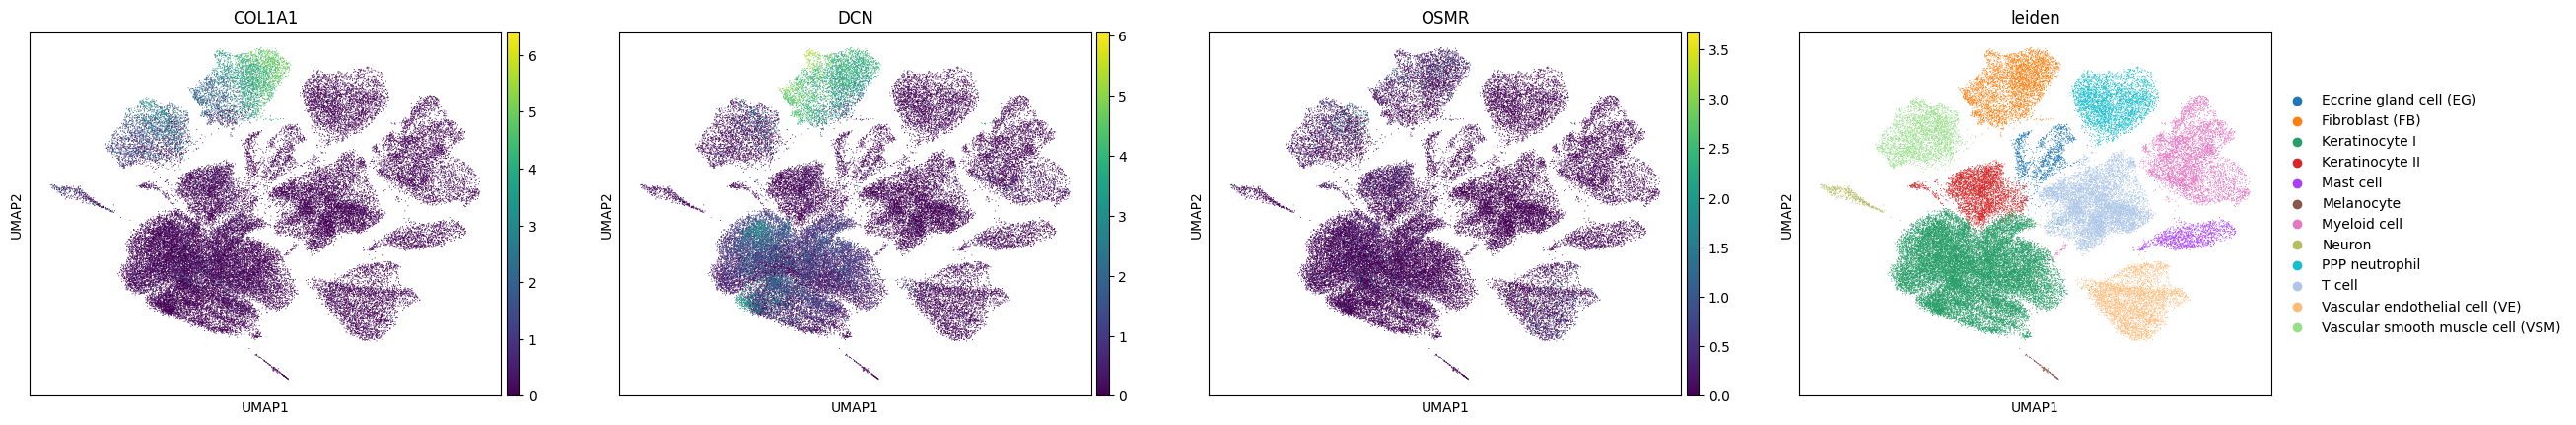

In [4]:
adata_all = ad.read_h5ad('processed_data/ALL_PPP_10X.h5ad')
adata_all_raw = ad.read_h5ad('processed_data/ALL_PPP_10X_raw.h5ad')
sc.pl.umap(adata_all, color=['COL1A1', 'DCN', 'OSMR', 'leiden'])

/home/wu/scanpy/scanpy/plotting/_tools/scatterplots.py:399: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


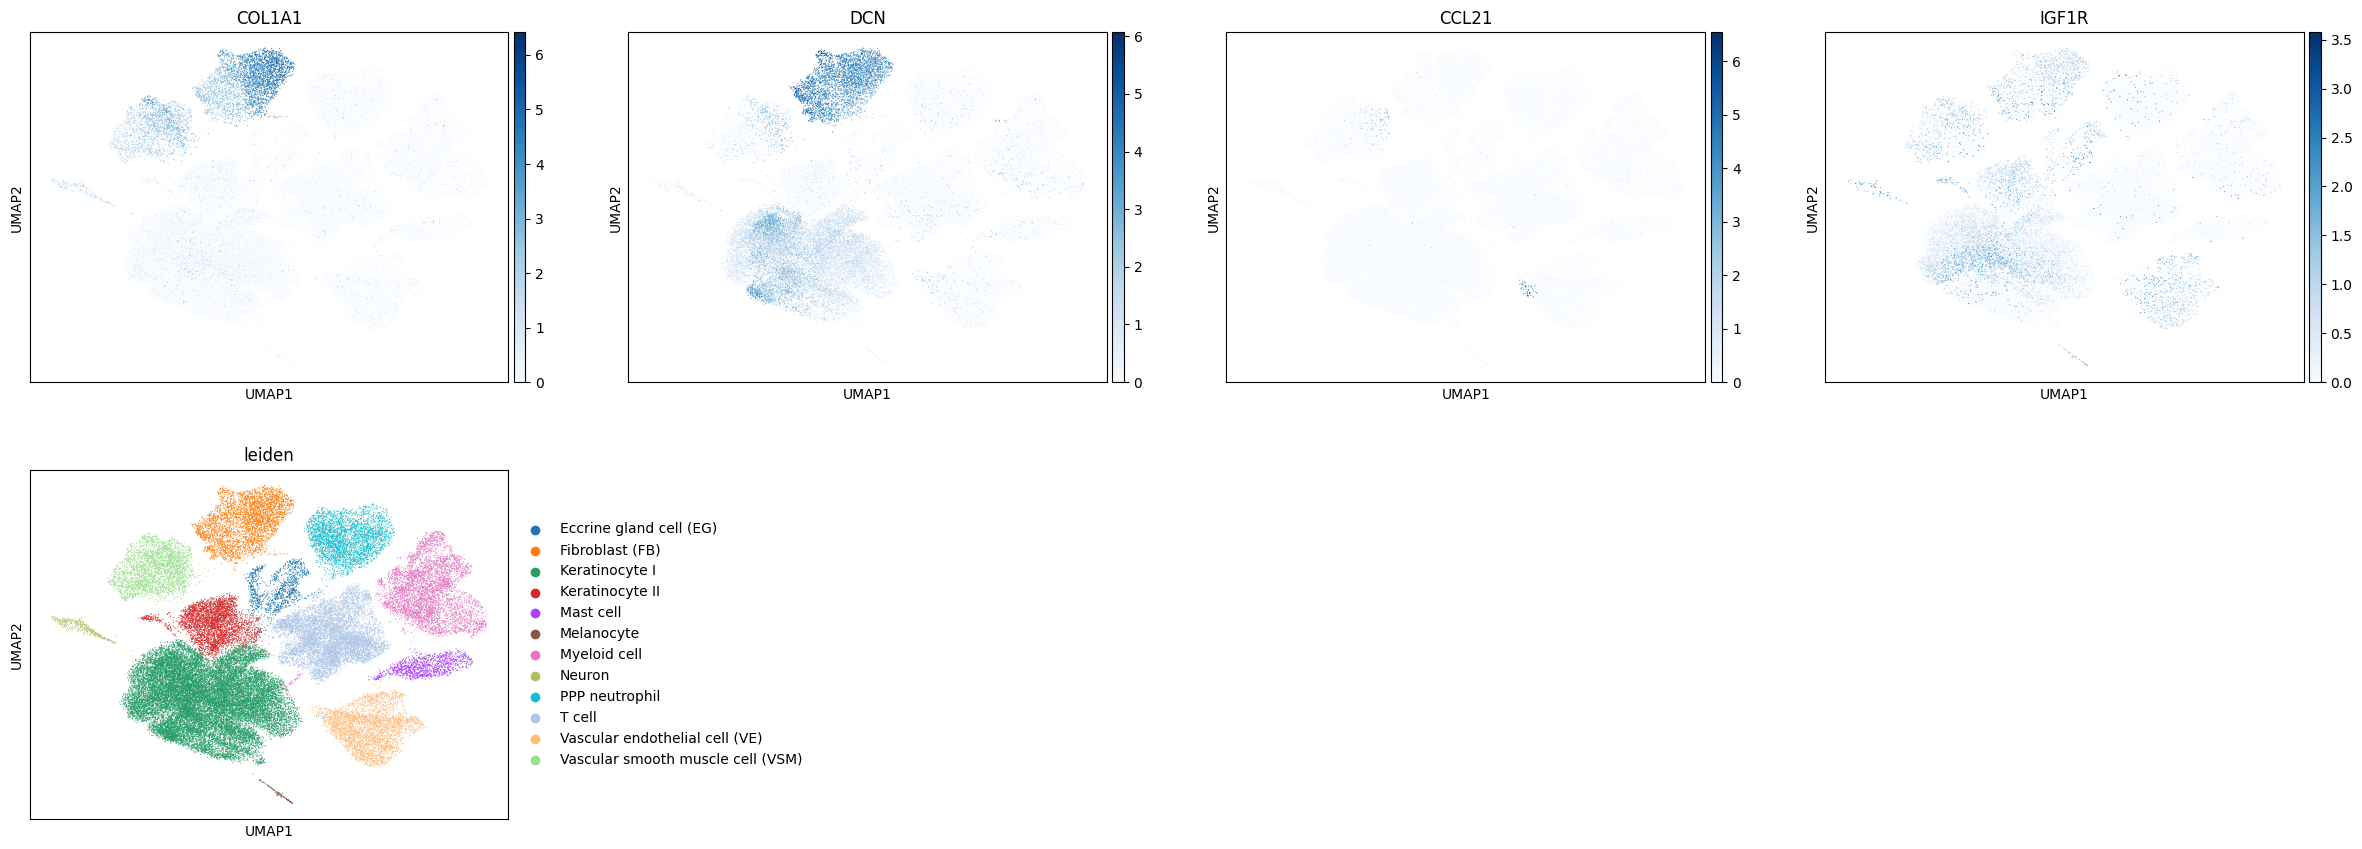

In [5]:
sc.pl.umap(adata_all, color=['COL1A1', 'DCN', 'CCL21', 'IGF1R', 'leiden'], cmap='Blues')

In [6]:
adata_all.obs.leiden.cat.categories

Index(['Eccrine gland cell (EG)', 'Fibroblast (FB)', 'Keratinocyte I',
       'Keratinocyte II', 'Mast cell', 'Melanocyte', 'Myeloid cell', 'Neuron',
       'PPP neutrophil', 'T cell', 'Vascular endothelial cell (VE)',
       'Vascular smooth muscle cell (VSM)'],
      dtype='object')

In [7]:
adata_dermis = adata_all.raw.to_adata()[adata_all.obs['leiden'].str.contains('Fibroblast|Vascular endothelial cell|Vascular smooth muscle cell|Neuron|Eccrine')].copy()

In [8]:
adata_dermis.obs['leiden_rough'] = adata_dermis.obs['leiden'].copy()
adata_dermis.layers['counts'] = adata_all_raw[adata_all.obs['leiden'].str.contains('Fibroblast|Vascular endothelial cell|Vascular smooth muscle cell|Neuron|Eccrine')].X.copy()
adata_dermis

AnnData object with n_obs × n_vars = 12269 × 18704
    obs: 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'batch_origin', 'batch_group', 'Meta', 'Gender', 'Age', 'leiden', 'leiden_rough'
    var: 'n_cells', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'batch', 'batch_colors', 'batch_group_colors', 'batch_origin_colors', 'batch_raw', 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

Standardizing Data across genes.

Found 16 batches

Found 0 numerical variables:
	

Found 50 genes with zero variance.
Fitting L/S model and finding priors

Finding parametric adjustments



/home/wu/scanpy/scanpy/preprocessing/_combat.py:340: RuntimeWarning: invalid value encountered in divide
  (abs(g_new - g_old) / g_old).max(), (abs(d_new - d_old) / d_old).max()
/home/wu/scanpy/scanpy/preprocessing/_combat.py:340: RuntimeWarning: divide by zero encountered in divide
  (abs(g_new - g_old) / g_old).max(), (abs(d_new - d_old) / d_old).max()


Adjusting data

regressing out ['total_counts', 'pct_counts_mt']
    finished (0:00:45)
extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/home/wu/scanpy/scanpy/preprocessing/_highly_variable_genes.py:212: RuntimeWarning: invalid value encountered in log
  dispersion = np.log(dispersion)


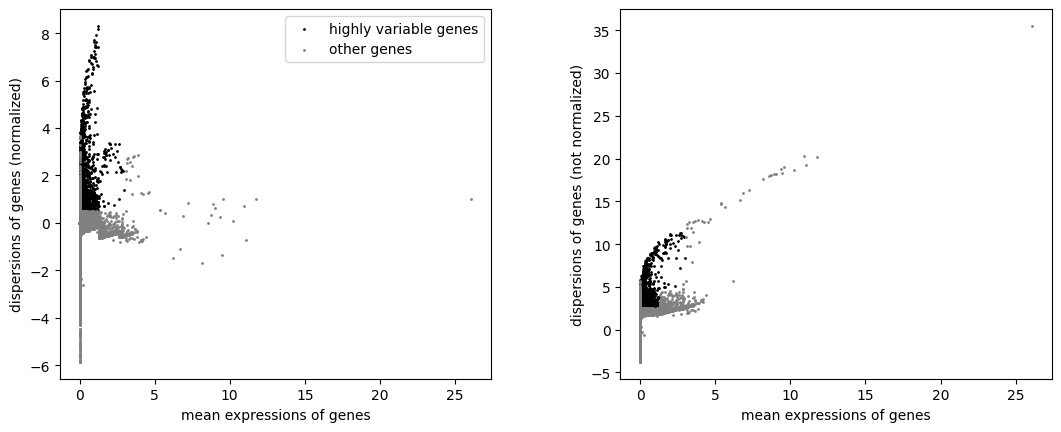

In [9]:
adata_dermis.raw = adata_dermis

sc.pp.combat(adata_dermis, key='batch')

sc.pp.regress_out(adata_dermis, ['total_counts', 'pct_counts_mt'], n_jobs=4, add_intercept=True)

sc.pp.highly_variable_genes(adata_dermis, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata_dermis)

sc.pp.scale(adata_dermis, max_value=10)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:11)


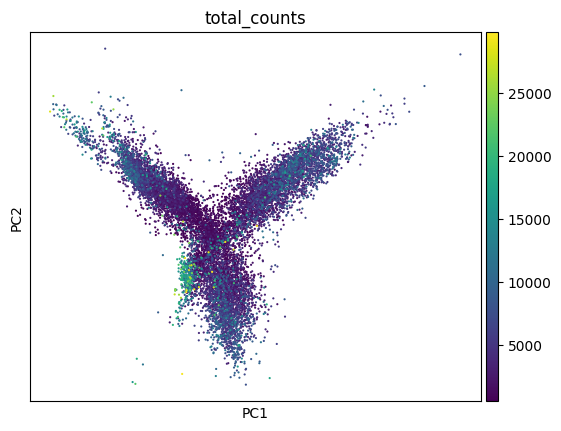

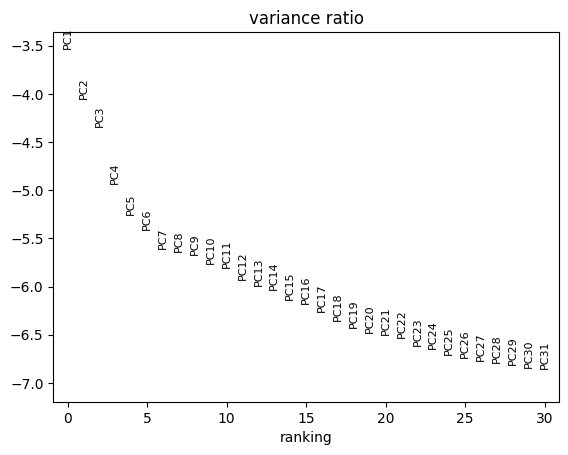

computing neighbors
    using 'X_pca' with n_pcs = 20


/home/wu/mambaforge/envs/github_scanpy/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:18)


In [10]:
sc.tl.pca(adata_dermis, svd_solver='arpack', random_state=seed)
sc.pl.pca(adata_dermis, color='total_counts')

sc.pl.pca_variance_ratio(adata_dermis, log=True)

sc.pp.neighbors(adata_dermis, n_neighbors=15, n_pcs=20, random_state=seed)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:04)
running Leiden clustering
    finished: found 15 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


/home/wu/scanpy/scanpy/plotting/_tools/scatterplots.py:399: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/wu/scanpy/scanpy/plotting/_tools/scatterplots.py:399: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/wu/scanpy/scanpy/plotting/_tools/scatterplots.py:399: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/wu/scanpy/scanpy/plotting/_tools/scatterplots.py:399: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/wu/scanpy/scanpy/plotting/_tools/scatterplots.py:399: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


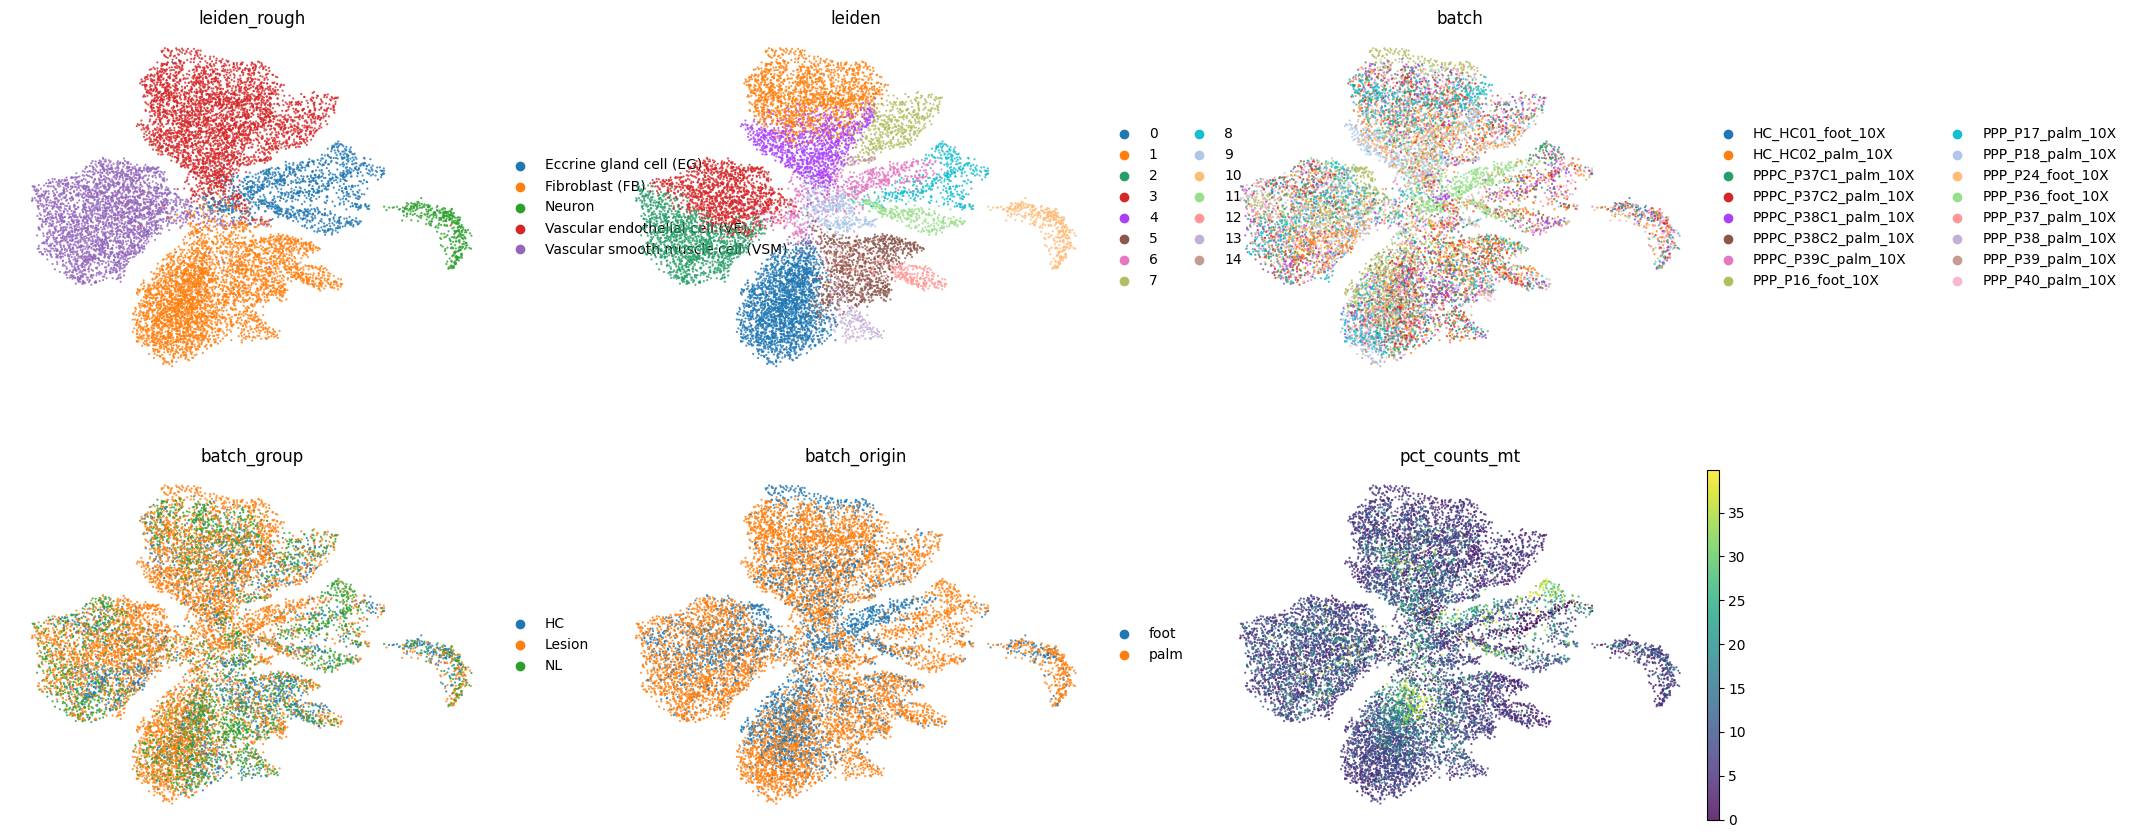

In [11]:
sc.tl.umap(adata_dermis, random_state=seed, min_dist=0.6, spread=0.6)
# sc.pl.umap(adata_immu)

sc.tl.leiden(adata_dermis, resolution=0.5, random_state=seed)
sc.pl.umap(adata_dermis, color=['leiden_rough', 'leiden', 'batch', 'batch_group', 'batch_origin', 'pct_counts_mt'], frameon=False, size=10, alpha=0.8, ncols=3)

/home/wu/scanpy/scanpy/plotting/_tools/scatterplots.py:399: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/wu/scanpy/scanpy/plotting/_tools/scatterplots.py:399: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/wu/scanpy/scanpy/plotting/_tools/scatterplots.py:399: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


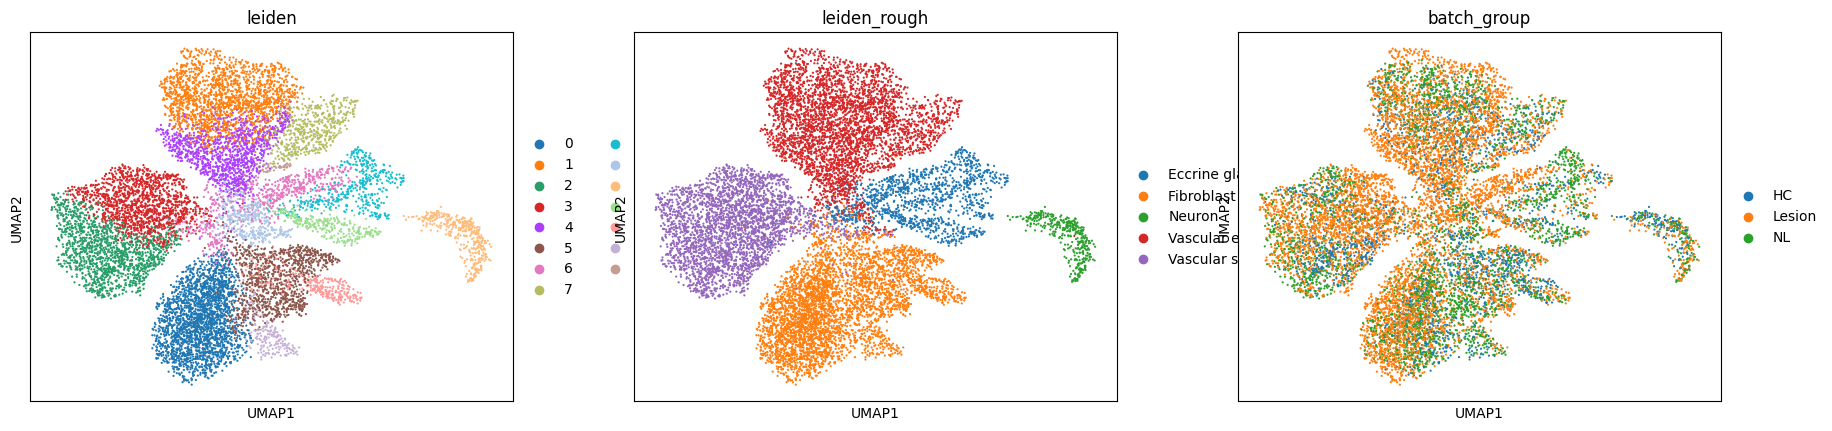

In [12]:
sc.pl.umap(adata_dermis, color=['leiden', 'leiden_rough', 'batch_group'], size=10)

/home/wu/scanpy/scanpy/plotting/_tools/scatterplots.py:399: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


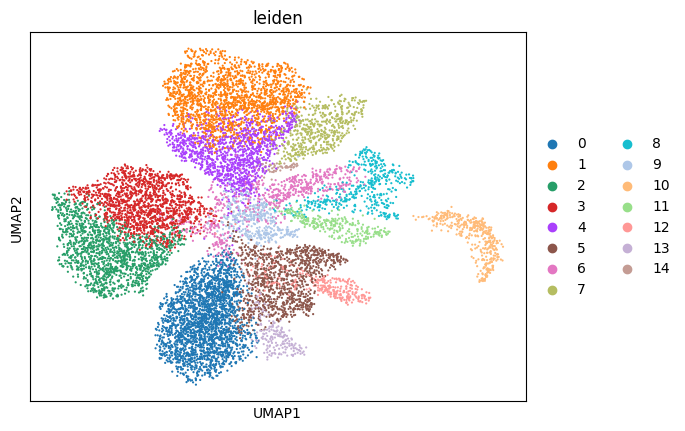

In [17]:
sc.pl.umap(adata_dermis, color=['leiden'], size=10)

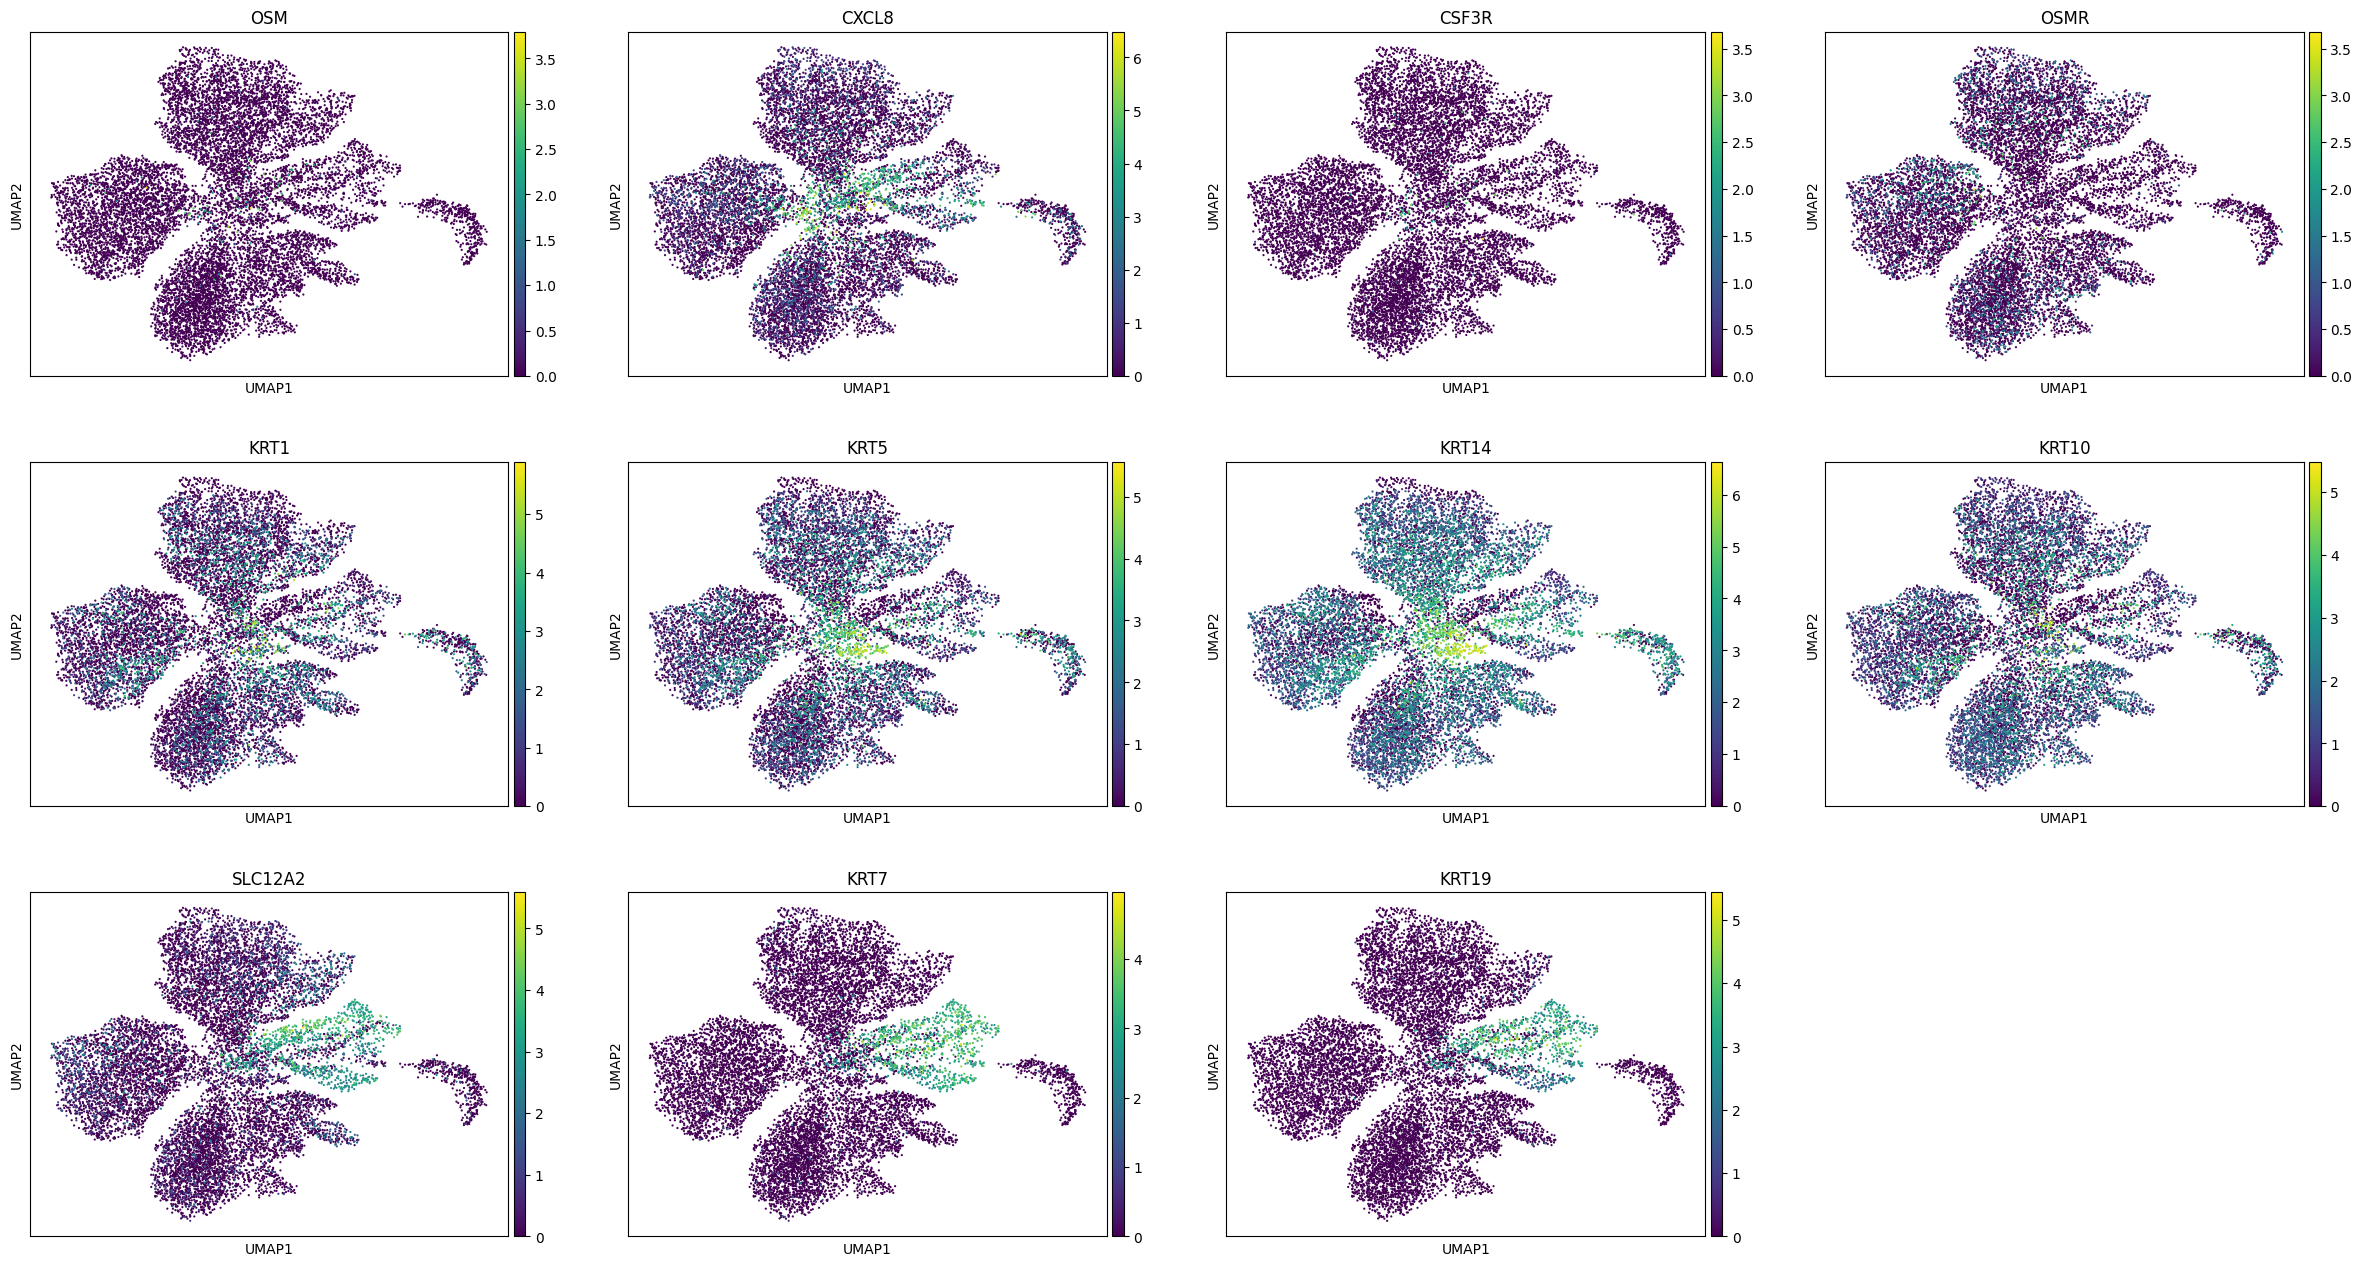

In [13]:
sc.pl.umap(adata_dermis, color=['OSM', 'CXCL8', 'CSF3R', 'OSMR', 'KRT1', 'KRT5', 'KRT14', 'KRT10', "SLC12A2", "KRT7", "KRT19"], size=10)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


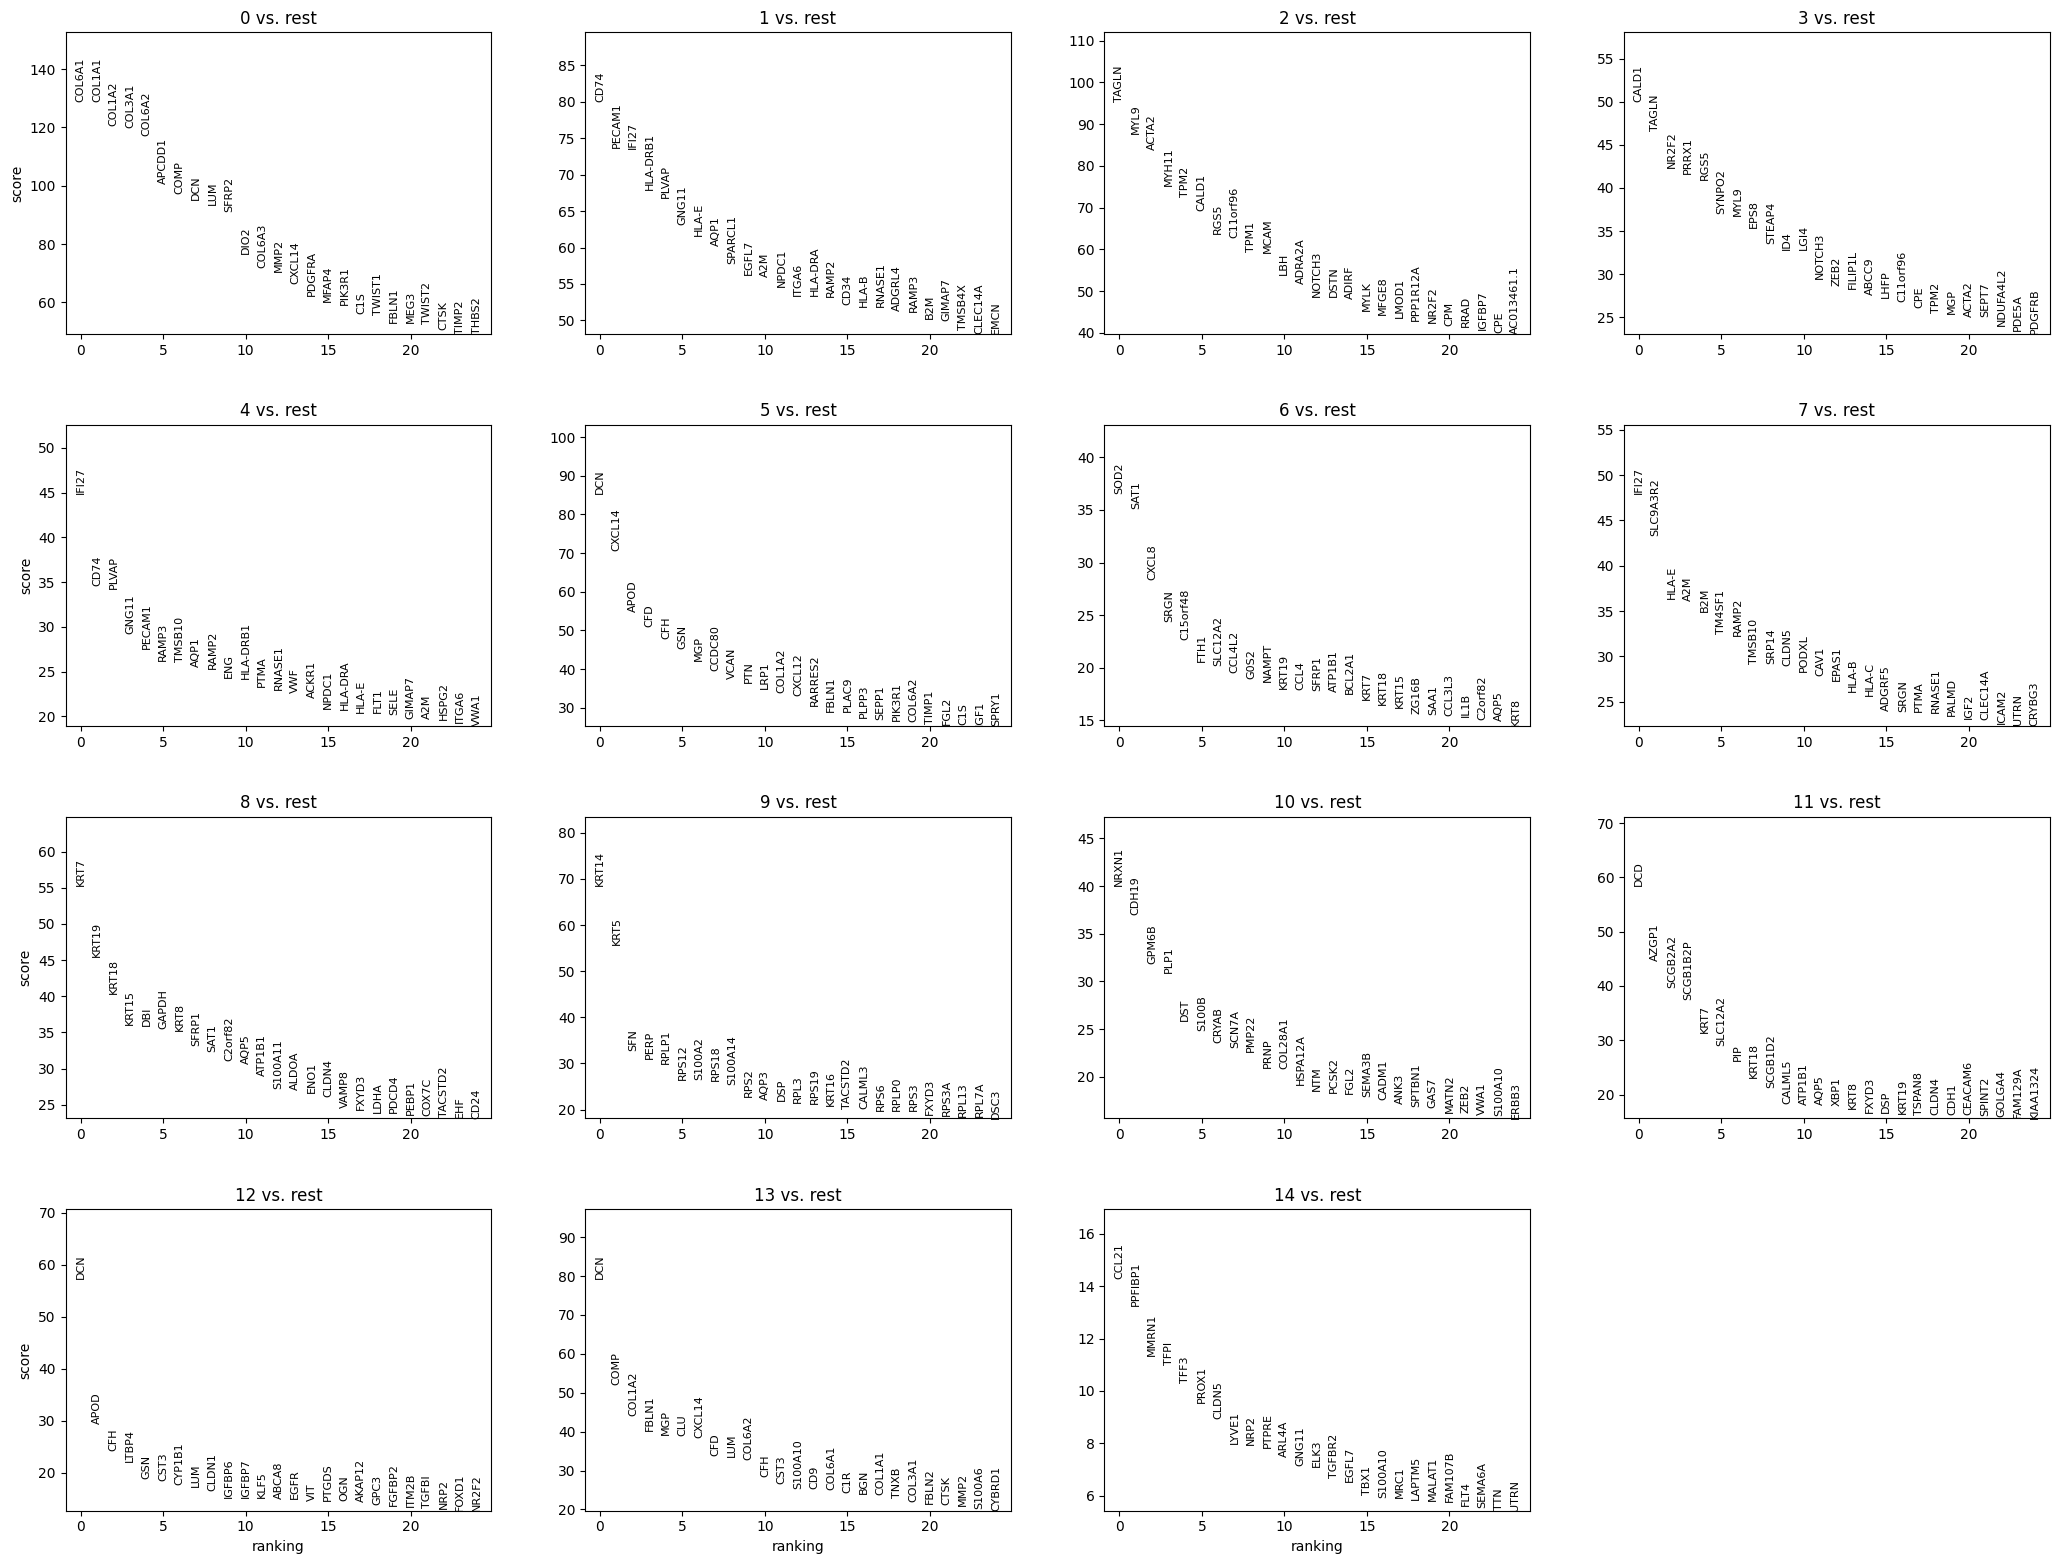

In [14]:
sc.tl.rank_genes_groups(adata_dermis, 'leiden', method='t-test', n_genes=1000)
sc.pl.rank_genes_groups(adata_dermis, n_genes=25, sharey=False)

/home/wu/scanpy/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


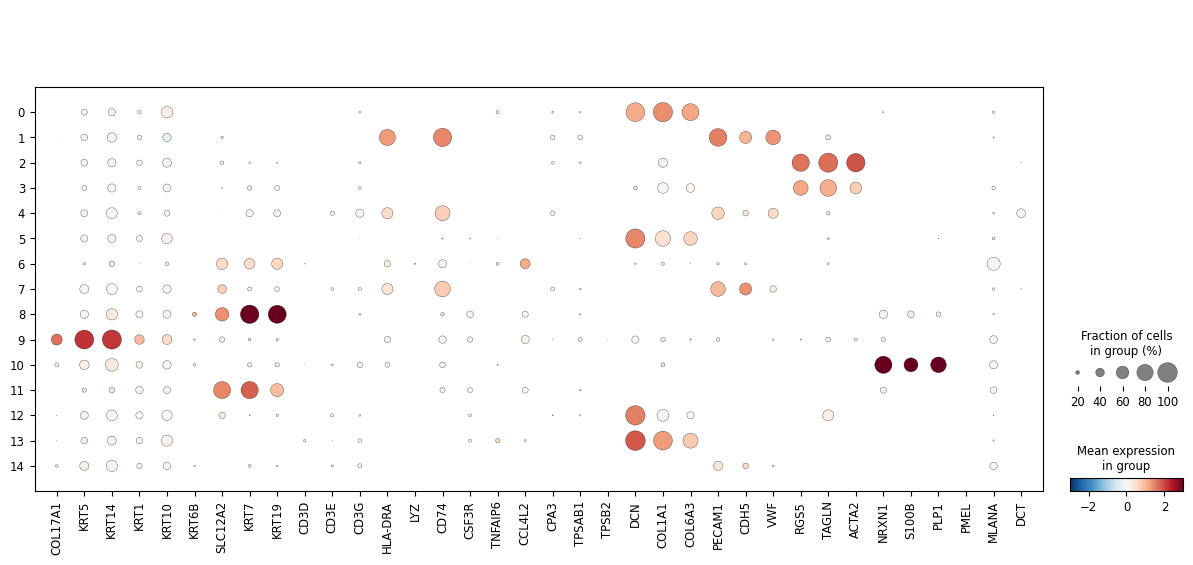

In [15]:
marker_genes = ["COL17A1", "KRT5", "KRT14", "KRT1", "KRT10", "KRT6B", "SLC12A2", "KRT7", "KRT19","CD3D","CD3E","CD3G",
                "HLA-DRA", "LYZ", "CD74", "CSF3R", "TNFAIP6","CCL4L2","CPA3","TPSAB1","TPSB2",
                "DCN","COL1A1","COL6A3","PECAM1","CDH5","VWF","RGS5","TAGLN","ACTA2",
                "NRXN1","S100B","PLP1","PMEL", "MLANA", "DCT"]

with rc_context({'figure.figsize': (8, 7)}):
    sc.pl.dotplot(adata_dermis, marker_genes, groupby='leiden', show=False, use_raw=False, dot_max=1, dot_min=0.1, color_map='RdBu_r', vmax=3, vmin=-3)

/home/wu/scanpy/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


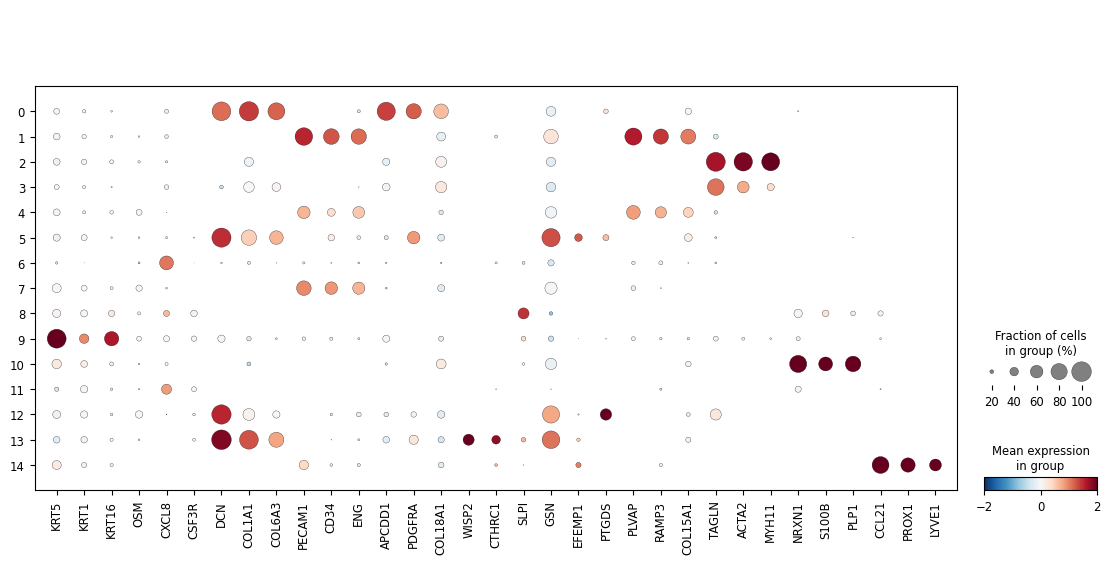

In [16]:
marker_gene = ['KRT5', 'KRT1', 'KRT16', # Keratinocyte
               'OSM', 'CXCL8', 'CSF3R', # PPP neutrophil
               "DCN","COL1A1","COL6A3", # Fibroblast
                'PECAM1', 'CD34', 'ENG', # Vascular endothelial cell
                'APCDD1', 'PDGFRA', 'COL18A1', # Secretory papillary fibroblast
                'WISP2', 'CTHRC1', 'SLPI', # Secretory reticular fibroblast
                'GSN', 'EFEMP1', 'PTGDS',  # Pro inflammatory fibroblast
                'PLVAP', 'RAMP3', 'COL15A1', # 'IGFBP7', # Inflammatory endothelial cell
                'TAGLN', 'ACTA2', 'MYH11', # Vascular smooth muscle cell
                "NRXN1","S100B","PLP1", # Neuron
                "CCL21", "PROX1", "LYVE1", # Lymphatic endothelial cell
               ]

sc.pl.dotplot(adata_dermis, marker_gene, groupby='leiden', use_raw=False, dot_max=1, dot_min=0.1, color_map='RdBu_r', vmax=2, vmin=-2)

/home/wu/scanpy/scanpy/plotting/_tools/scatterplots.py:399: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/wu/scanpy/scanpy/plotting/_tools/scatterplots.py:399: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/wu/scanpy/scanpy/plotting/_tools/scatterplots.py:399: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/wu/scanpy/scanpy/plotting/_tools/scatterplots.py:399: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


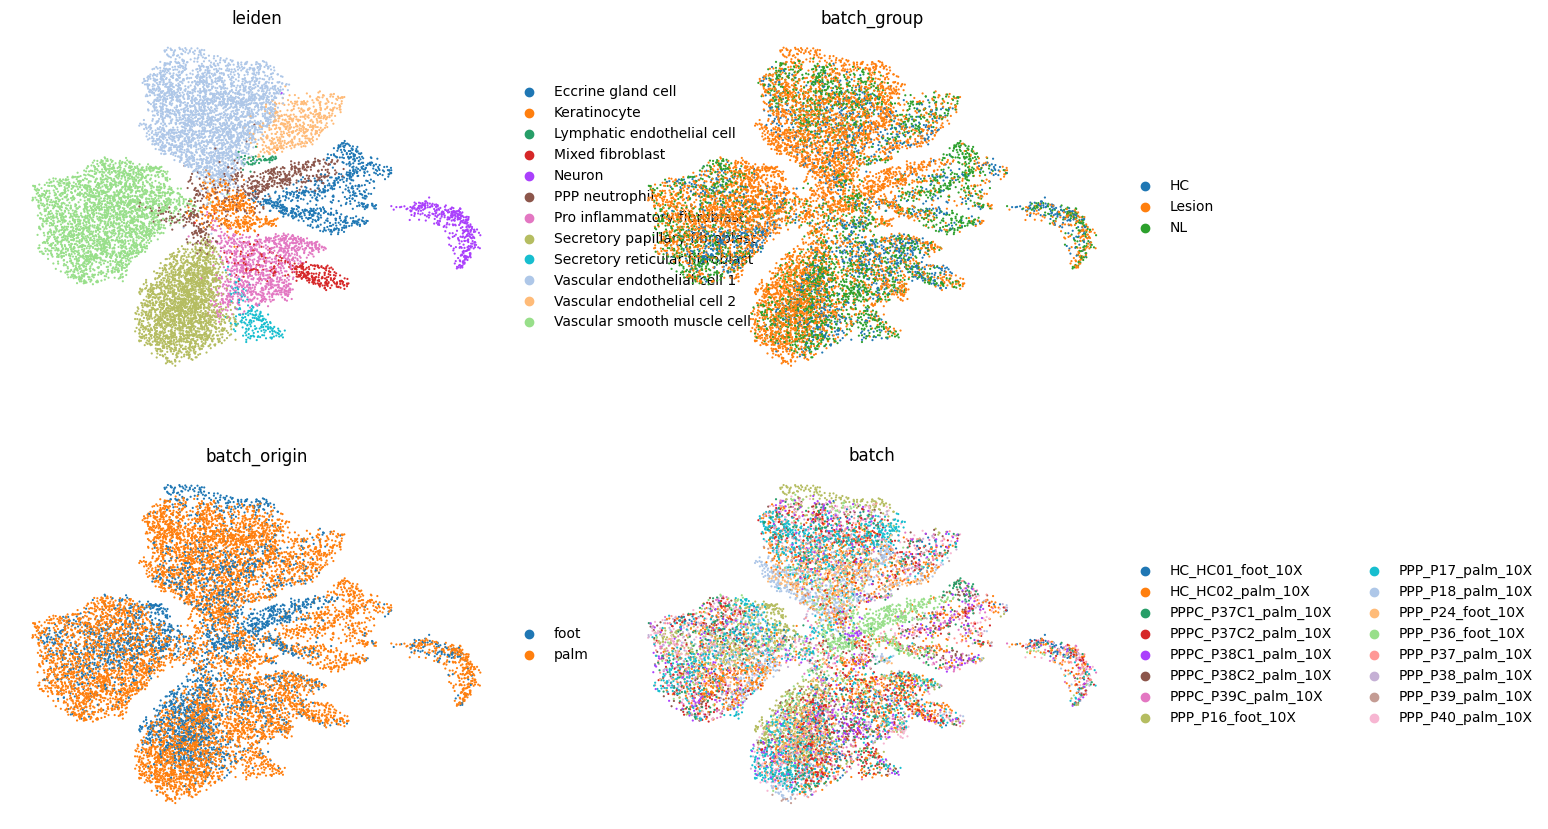

/home/wu/scanpy/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


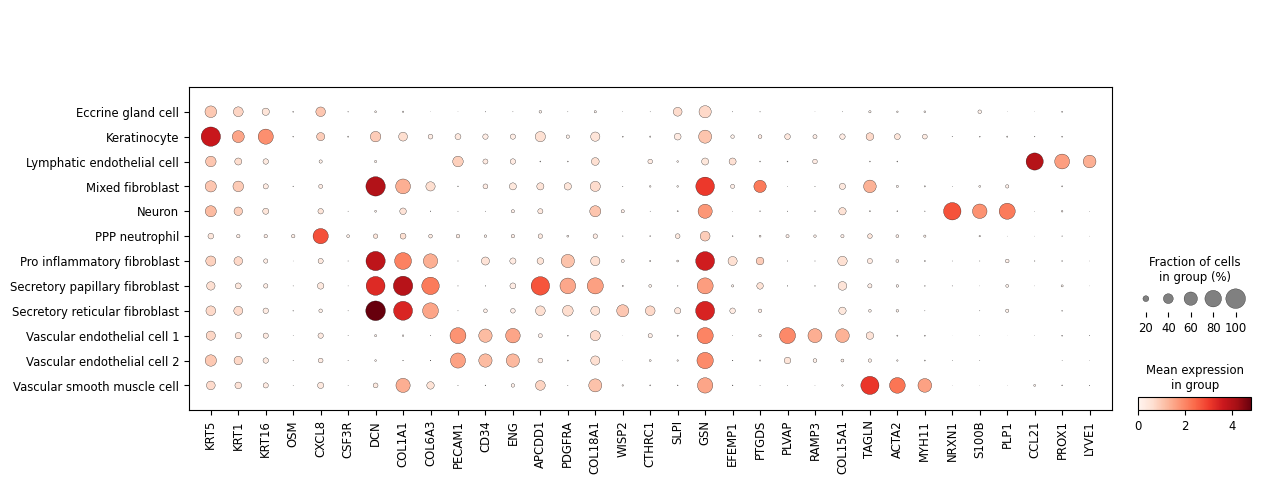

In [18]:
cluster_names = {
    '0': 'Secretory papillary fibroblast',
    '1': 'Vascular endothelial cell 1',
    '2': 'Vascular smooth muscle cell',
    '3': 'Vascular smooth muscle cell',
    '4': 'Vascular endothelial cell 1',
    '5': 'Pro inflammatory fibroblast',
    '6': 'PPP neutrophil', # mixed cell
    '7': 'Vascular endothelial cell 2',
    '8': 'Eccrine gland cell',
    '9': 'Keratinocyte',
    '10': 'Neuron',
    '11': 'Eccrine gland cell',
    '12': 'Mixed fibroblast',
    '13': 'Secretory reticular fibroblast',
    '14': 'Lymphatic endothelial cell',
}

adata_dermis.obs['leiden'] = adata_dermis.obs['leiden'].map(cluster_names).astype('category')
sc.pl.umap(adata_dermis, color=['leiden', 'batch_group', 'batch_origin', 'batch'], ncols=2, frameon=False)
sc.pl.dotplot(adata_dermis, marker_gene, groupby='leiden')

In [19]:
# remove technical mixed cell types
adata_dermis = adata_dermis[~adata_dermis.obs['leiden'].isin(['PPP neutrophil', 'Keratinocyte', 'Mixed fibroblast'])].copy()

In [20]:
adata_dermis.obs.leiden = adata_dermis.obs.leiden.cat.reorder_categories(['Vascular endothelial cell 1', 'Vascular endothelial cell 2', 'Vascular smooth muscle cell', 
                                                                          'Secretory papillary fibroblast', 'Secretory reticular fibroblast', 'Pro inflammatory fibroblast',
                                                                            'Eccrine gland cell', 'Neuron', 'Lymphatic endothelial cell'])

In [21]:
adata_dermis.write_h5ad('processed_data/DERMIS_PPP_10X.h5ad')